# 0.0 Import

In [1]:
import pickle

import numpy    as np
import pandas   as pd
import seaborn  as sns

from scipy              import stats
from IPython.display    import Image

## 0.1 Help functions

In [2]:
# Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
# Corrigir Gráficos Jupter

from matplotlib import pyplot as plt
from IPython.core.display import HTML

def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['font.size'] = 12

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

jupyter_settings()

## 0.2 Load interim data

In [4]:
df3 = pickle.load( open( "../data/interim/df2_feature.pkl", "rb" ) )
df3.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,resposta
0,1,Male,44,28.000,26.000,1,3,1,0,40454.000,217,1
1,2,Male,76,3.000,26.000,1,2,0,0,33536.000,183,0
2,3,Male,47,28.000,26.000,1,3,1,0,38294.000,27,1
3,4,Male,21,11.000,152.000,1,1,0,1,28619.000,203,0
4,5,Female,29,41.000,152.000,1,1,0,1,27496.000,39,0


# 1.0 EDA

In [5]:
df3.columns

Index(['id', 'genero', 'idade', 'codigo_regiao', 'contato_cliente', 'cnh',
       'idade_veiculo', 'veiculo_danificado', 'seguro_previo_automovel',
       'premio_anual', 'cliente_dias_contrato', 'resposta'],
      dtype='object')

## 1.1 Univariada

### 1.1.1 idade

<AxesSubplot:xlabel='idade', ylabel='Count'>

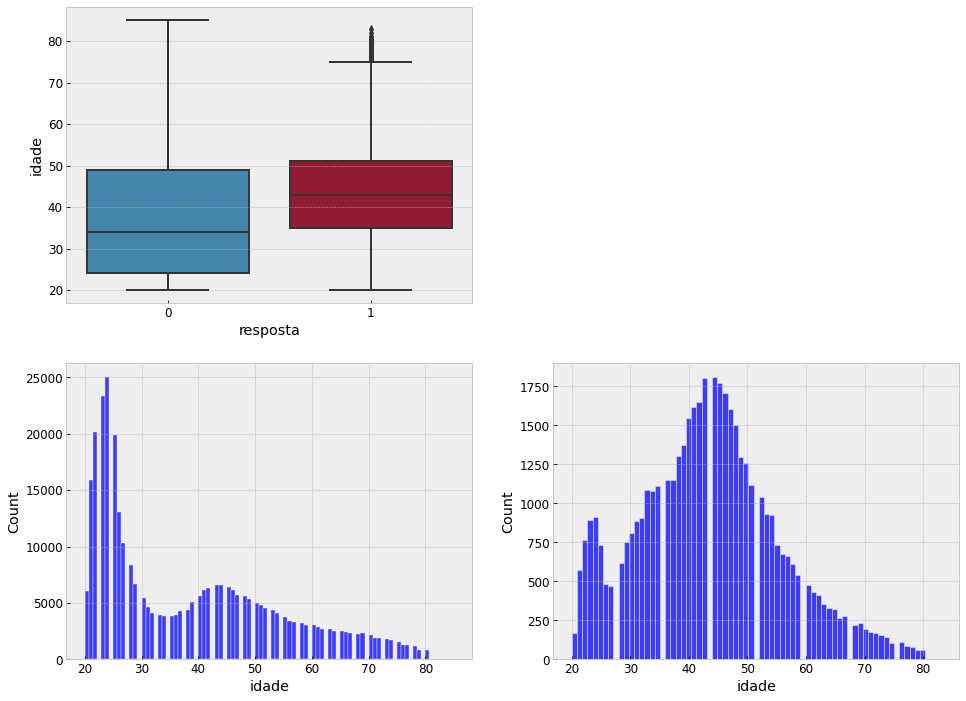

In [6]:
#'idade'
plt.subplot(2,2,1)
sns.boxplot(x='resposta', y='idade', data=df3)

aux1 = df3.loc[df3['resposta'] == 0, 'idade']
plt.subplot(2,2,3)
sns.histplot(x=aux1)

aux2 = df3.loc[df3['resposta'] == 1, 'idade']
plt.subplot(2,2,4)
sns.histplot(x=aux2)

Insight:

Pessoas mais velhas tem mais interesse no produto.

Pelo boxplot há uma concentração de dados para pessoas mais velhas.

Pessoas mais novas tem menos interesse no produto.

Cuidado com o balanceamento dos dados.

Idade pode ser útil para o modelo.

In [7]:
del aux1, aux2

### 1.1.2 premio_anual

<AxesSubplot:xlabel='premio_anual', ylabel='Count'>

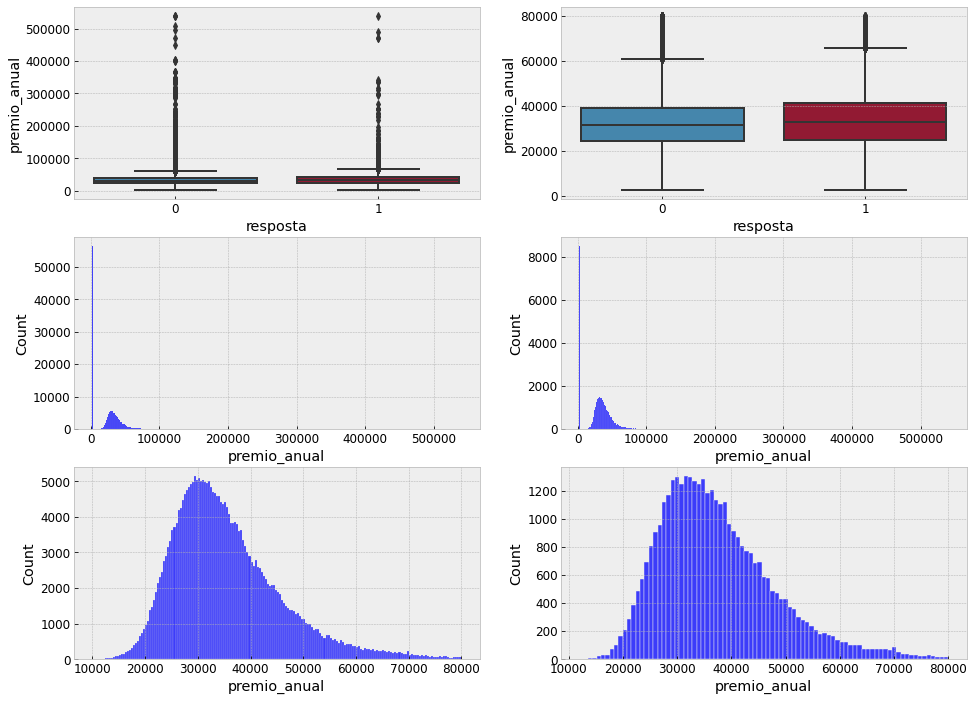

In [8]:
#'premio_anual'
#plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.boxplot(x='resposta', y='premio_anual', data=df3)

aux2 = df3[df3['premio_anual'] < 80000]
plt.subplot(3,2,2)
sns.boxplot(x='resposta', y='premio_anual', data=aux2)

aux2 = df3.loc[df3['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,3)
sns.histplot(x=aux2)

aux3 = df3.loc[df3['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,4)
sns.histplot(x=aux3)

# Filto pelo valor do premio_anual #
aux4 = df3[(df3['premio_anual'] > 10000) & (df3['premio_anual'] < 80000)]

aux5 = aux4.loc[aux4['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,5)
sns.histplot(x=aux5)

aux6 = aux4.loc[aux4['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,6)
sns.histplot(x=aux6)

Insight:

Há muitos outliers.

No boxplot não há diferênça factual entre as distribuições.

Cuidado com o balanceamento dos dados.

As curvas estão bem parecida, então essa variável só não me diz muita coisa.

Essa variável pode ser atrelada a outras para ajudar no Modelo.

In [9]:
del aux1, aux2, aux3, aux4, aux5, aux6

NameError: name 'aux1' is not defined

### 1.1.3 cnh

,resposta,cnh,cnh_percent
0,0,333628,0.877
1,1,46669,0.123


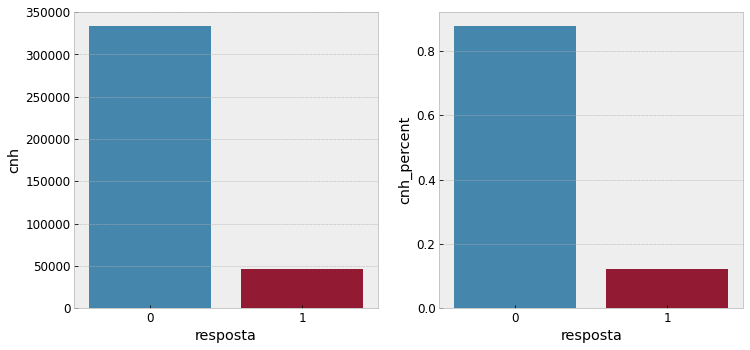

In [ ]:
#'cnh'
plt.figure(figsize=(12,12))

aux1 = df3[['cnh', 'resposta']].groupby(['resposta']).sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(x='resposta', y='cnh', data=aux1, ci= True)

aux1['cnh_percent'] = aux1['cnh'] / aux1['cnh'].sum()
plt.subplot(2,2,2)
sns.barplot(x='resposta', y='cnh_percent', data=aux1, ci= True)

aux1

Insight:

Muito interessante, quem tem CNH tem bem menos predisposição a contratar o produto.

Atenção a idade pode está interferindo nessa visualização.

Deve ser analizado, pelo menos, em conjunto com a idade.

In [ ]:
del aux1

### 1.1.4 codigo_regiao

<AxesSubplot:xlabel='codigo_regiao', ylabel='id'>

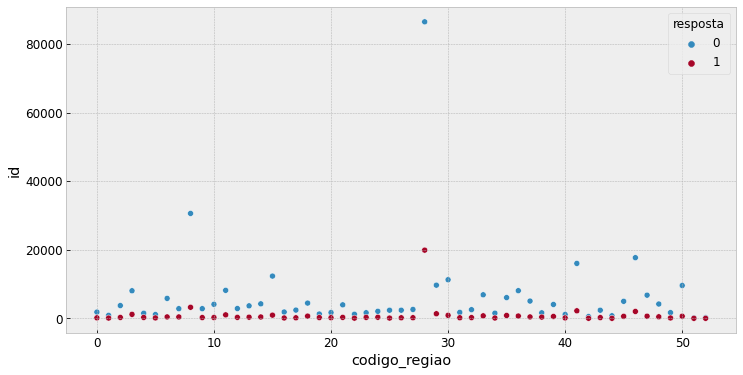

In [13]:
#'codigo_regiao'

aux1 = df3[['id', 'resposta', 'codigo_regiao']].groupby(['codigo_regiao','resposta',]).count().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(x='codigo_regiao', y='id', data=aux1, hue='resposta')

Insight:

A variável resposta em relação ao código_região está muito junta, difícil de separar.

Não há uma separação clara dos valores.

Essa variável, possivelmente, deve ser agregada a outra para performar melhor no modelo.

In [14]:
del aux1

### 1.1.3 genero

In [ ]:
#'genero'

### 1.1.5 contato_cliente

In [ ]:
#'contato_cliente'

### 1.1.7 idade_veiculo

In [ ]:
#'idade_veiculo'

### 1.1.8 veiculo_danificado'

In [ ]:
#'veiculo_danificado'

### 1.1.9 seguro_previo_automovel

In [ ]:
#'seguro_previo_automovel'

### 1.1.10 cliente_dias_contrato

In [ ]:
#'cliente_dias_contrato'

### 1.1.11 resposta

In [ ]:
#'resposta'

## 1.2 Bivariada

## 1.3 Multivariada

## 1.4 Hipóteses
Inserida no __2º Cíclo CRISP__